**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 12: Applications of Time Series Methods in Macroeconomics and Finance**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 12.1
NYSE.XLS contains data on the percentage change in stock prices (ΔY) each
month from 1952 through 1995 on the New York Stock Exchange (NYSE). For
those interested in precise details, the data are value-weighted stock returns exclusive
of dividends deflated using the consumer price index. Note that this data is
already in differenced form but deviations from the mean have not been taken,
i.e. it is ΔY not Y or Δy.

(a) Make a time series plot of this data and comment on any patterns you observe.

In [2]:
import pandas as pd
nyse = pd.read_excel(r'datasets\NYSE.xls')
nyse

,Date,Return
0,520131,0.015460
1,520229,-0.032049
2,520331,0.041241
3,520430,-0.050401
4,520529,0.025041
...,...,...
523,950831,0.003925
524,950929,0.037653
525,951031,-0.012804
526,951130,0.044593


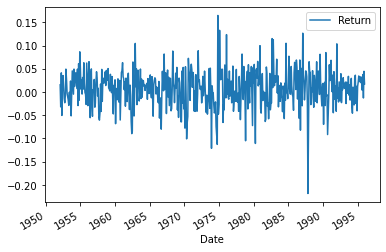

In [6]:
# Cleaning data #1969 change
nyse['Date'] = pd.to_datetime(nyse['Date'], format = '%y%m%d')
nyse = nyse.assign(Date = [x.replace(year = x.year - 100) if x.year > nyse.iloc[-1, 0].year else x.replace(year = x.year) for x in nyse['Date']])
nyse.plot(x = 'Date', y = 'Return')

(b) Using the techniques discussed in Chapter 10, comment on the univariate
time series properties of ΔY. What does its autocorrelation function look like?
If you build an AR(p) model using this data what is p? Is ΔY stationary? Are
stock returns on the NYSE predictable (i.e. can past stock returns help you
to predict current values)?

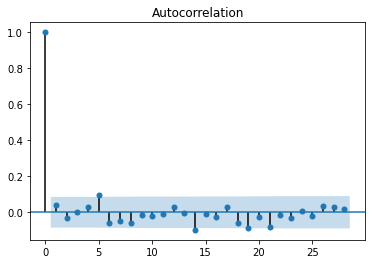

In [11]:
# ACF function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(nyse['Return']);

(c) Assume that the original series, Y, follows a random walk such that an AR(0)
model for ΔY is appropriate (possibly with an intercept). Calculate the volatility
of this variable as described in this chapter.

(d) Plot the volatility of this series. Does it appear that volatility clustering is
present?


(e) Construct an AR(p) model for the volatility series and discuss its properties.
Can past values of volatility on the stock market help you to predict current
volatility?

In [52]:
# 

# Exercise 12.2
NYSE.XLS contains data on the percentage change in stock prices (ΔY) each
month from 1952 through 1995 on the New York Stock Exchange (NYSE).
(a) Estimate ARCH(p) models for various values of p. Is there volatility clustering
in this data (i.e. does an ARCH model beat a simpler model where there is
constant volatility which means γ1 =, . . ., = γp = 0) ? Which value of p is
preferable?

(b) For your preferred choice of p, make a time series plot of volatility (i.e. plot
a graph of 
 t
2).



(c) Repeat parts (a) and (b) using a GARCH(p,q) model. Does your graph of
volatility look the same with ARCH and GARCH models?